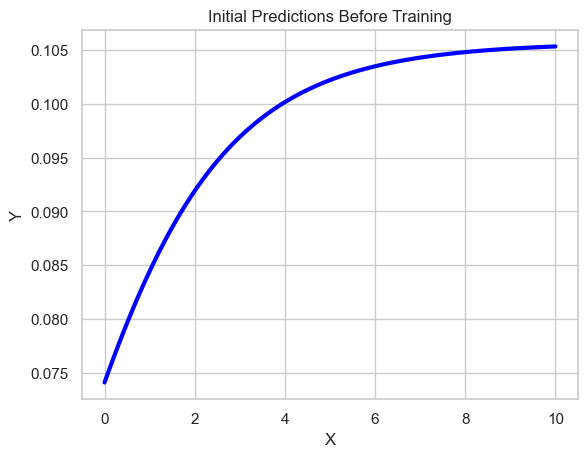

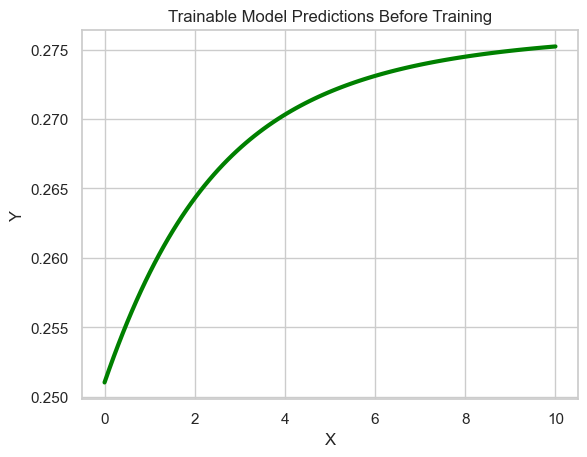

C:\Users\Pc\anaconda3\Lib\site-packages\torch\nn\modules\loss.py:608: UserWarning: Using a target size (torch.Size([])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch 1/100, Total Loss: 0.8106882150750607
Epoch 2/100, Total Loss: 0.029360900522078737
Epoch 3/100, Total Loss: 0.005039327748469269
Epoch 4/100, Total Loss: 0.0036932686847743756
Epoch 5/100, Total Loss: 0.0035427059999326715
Epoch 6/100, Total Loss: 0.003520122414078841
Epoch 7/100, Total Loss: 0.0035162957988763566
Epoch 8/100, Total Loss: 0.0035154410662734392
Epoch 9/100, Total Loss: 0.0035150339921194984
Epoch 10/100, Total Loss: 0.003514704589978379
Epoch 11/100, Total Loss: 0.0035144044776114214
Epoch 12/100, Total Loss: 0.0035140910104818346
Epoch 13/100, Total Loss: 0.0035137760250165684
Epoch 14/100, Total Loss: 0.003513466551194
Epoch 15/100, Total Loss: 0.003513166192179895
Epoch 16/100, Total Loss: 0.003512863210369588
Epoch 17/100, Total Loss: 0.0035125465381895538
Epoch 18/100, Total Loss: 0.003512242458636905
Epoch 19/100, Total Loss: 0.0035119268889083344
Epoch 20/100, Total Loss: 0.003511622293027372
Epoch 21/100, Total Loss: 0.0035112995410244707
Epoch 22/100, To

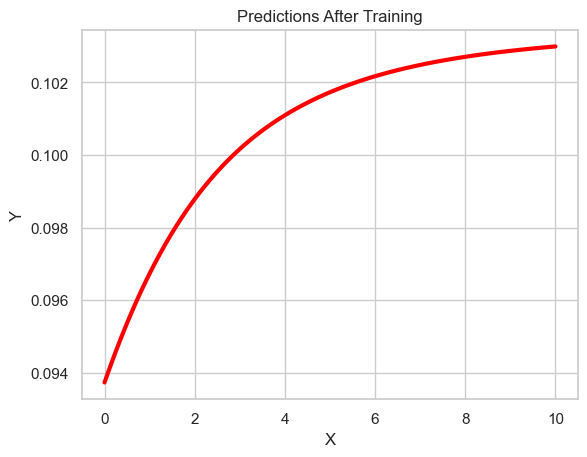

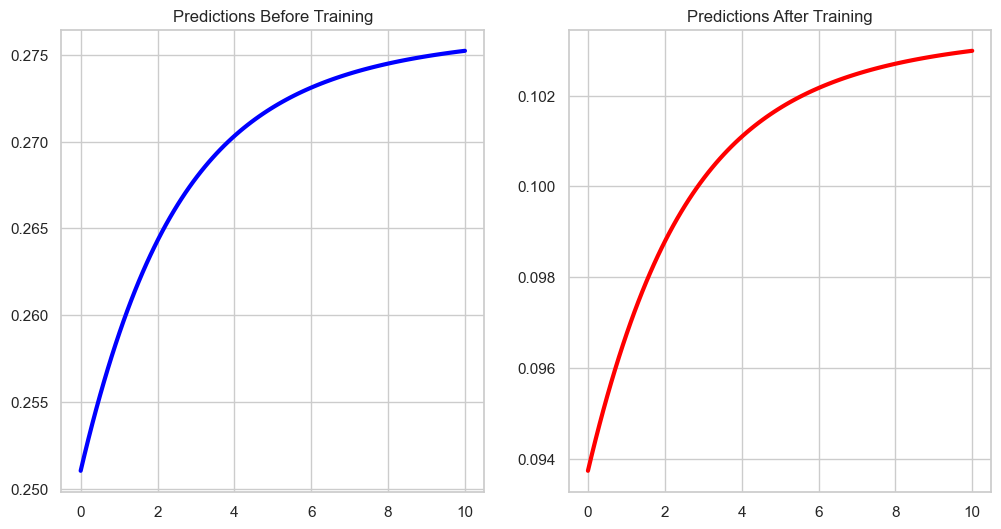

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD
import seaborn as sns
import matplotlib.pyplot as plt
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=False)
        
        self.w11 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=False)
        
        self.w20 = nn.Parameter(torch.rand(1), requires_grad=False)
        
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=False)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=False)

    def forward(self, x):
        layer_1_output = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        layer_2_output = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        layer_3_output = torch.sigmoid(self.w02 * x + self.b02) * self.w13
        
        output = layer_1_output + layer_2_output + layer_3_output
        
        output = torch.tanh(output) * self.w20
        return output
initial_model = SimpleNN()
X = torch.linspace(0, 10, 100)
Y = initial_model(X)

sns.set(style="whitegrid")
sns.lineplot(x=X.detach(), y=Y.detach(), color='blue', linewidth=3)
plt.title("Initial Predictions Before Training")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()
class TrainableNN(nn.Module):
    def __init__(self):
        super(TrainableNN, self).__init__()
        self.w00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w02 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w11 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w12 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w13 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.w20 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b00 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b01 = nn.Parameter(torch.rand(1), requires_grad=True)
        self.b02 = nn.Parameter(torch.rand(1), requires_grad=True)
    def forward(self, x):
        layer_1_output = torch.sigmoid(self.w00 * x + self.b00) * self.w11
        layer_2_output = torch.sigmoid(self.w01 * x + self.b01) * self.w12
        layer_3_output = torch.sigmoid(self.w02 * x + self.b02) * self.w13
        
        output = layer_1_output + layer_2_output + layer_3_output
        output = torch.tanh(output) * self.w20
        return output
trainable_model = TrainableNN()
optimizer = SGD(trainable_model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
with torch.no_grad():
    pre_train_predictions = trainable_model(X)

sns.lineplot(x=X.detach(), y=pre_train_predictions.detach(), color='green', linewidth=3)
plt.title("Trainable Model Predictions Before Training")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

epochs = 100
for epoch in range(epochs):
    total_loss = 0.0
    for i in range(len(X)):
        input_i = X[i]
        true_output_i = Y[i]
        predicted_output_i = trainable_model(input_i)
        loss = loss_fn(predicted_output_i, true_output_i)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f'Epoch {epoch+1}/{epochs}, Total Loss: {total_loss}')
with torch.no_grad():
    post_train_predictions = trainable_model(X)
sns.lineplot(x=X.detach(), y=post_train_predictions.detach(), color='red', linewidth=3)
plt.title("Predictions After Training")
plt.xlabel('X')
plt.ylabel('Y')
plt.show()

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.lineplot(x=X.detach(), y=pre_train_predictions.detach(), color='blue', linewidth=3)
plt.title("Predictions Before Training")

plt.subplot(1, 2, 2)
sns.lineplot(x=X.detach(), y=post_train_predictions.detach(), color='red', linewidth=3)
plt.title("Predictions After Training")

plt.show()
